In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.imports import *

In [3]:
PATH = '/home/paperspace/data/pills/'
sz=224
#arch=resnext101_64
arch=resnet34
bs=64

In [4]:
label_csv = f'{PATH}output.csv'
label_df = pd.read_csv(label_csv)

In [5]:
n = len(list(open(label_csv))) -1 
val_idxs = get_cv_idxs(n, val_pct=.21)

In [6]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, f'{PATH}dc', f'{PATH}output.csv', 
                                    val_idxs=val_idxs, 
                                    tfms=tfms, 
                                    bs=bs)

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=.5)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 97%|█████████▋| 144/149 [06:05<00:12,  2.54s/it, loss=76.1]

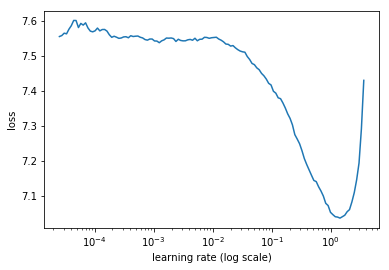

In [11]:
lrf=learn.lr_find()
learn.sched.plot()

In [8]:
lr = .75
learn.precompute = False
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      5.850667   5.000328   0.088802  
    1      5.49588    4.339088   0.153255                   
    2      5.688977   4.165041   0.175651                   



[4.1650414, 0.17565104141831397]

In [9]:
learn.save('pills_0')

In [10]:
learn.unfreeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 95%|█████████▌| 142/149 [06:17<00:18,  2.66s/it, loss=37.8]

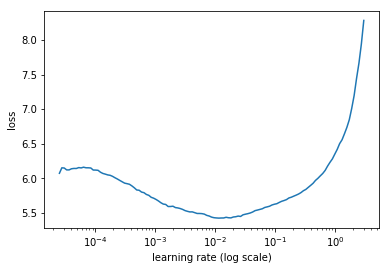

In [11]:
lrf=learn.lr_find()
learn.sched.plot()

In [ ]:
lr=np.array([1e-4,1e-3,1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  0%|          | 0/149 [00:00<?, ?it/s]                     


Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                   
    0      4.548127   4.042347   0.170052  
    1      4.203832   3.699032   0.217969                   
    2      3.934559   3.584906   0.230859                   
    3      3.879871   3.377399   0.274089                   


In [ ]:
learn.save('pills_1')

In [26]:
log_preds,y = learn.TTA(is_test=True, n_aug=4)
preds = np.mean(log_preds, 0)
probs = np.mean(np.exp(log_preds), axis=0)
indices = probs.argmax(axis=1)

In [39]:
data.classes[43]

'22'

In [31]:
preds = probs.argmax(axis=1)

In [32]:
preds

array([ 12,  43,  62, ..., 112, 105,  60])

In [37]:
indexed_preds = []
for index in preds:
    indexed_preds.append(data.classes[index])

In [38]:
indexed_preds

['11',
 '22',
 '4',
 '79',
 '111',
 '94',
 '118',
 '122',
 '73',
 '53',
 '9',
 '52',
 '68',
 '39',
 '23',
 '10',
 '66',
 '121',
 '36',
 '37',
 '42',
 '90',
 '88',
 '80',
 '1',
 '3',
 '94',
 '95',
 '29',
 '52',
 '27',
 '120',
 '95',
 '74',
 '92',
 '80',
 '18',
 '26',
 '86',
 '2',
 '92',
 '115',
 '22',
 '112',
 '17',
 '111',
 '5',
 '42',
 '84',
 '115',
 '60',
 '103',
 '14',
 '93',
 '62',
 '50',
 '14',
 '90',
 '6',
 '18',
 '43',
 '105',
 '98',
 '107',
 '49',
 '26',
 '37',
 '54',
 '10',
 '26',
 '13',
 '68',
 '25',
 '89',
 '76',
 '44',
 '106',
 '83',
 '94',
 '93',
 '48',
 '21',
 '29',
 '74',
 '113',
 '111',
 '17',
 '84',
 '22',
 '15',
 '6',
 '27',
 '54',
 '43',
 '107',
 '71',
 '25',
 '53',
 '8',
 '21',
 '121',
 '15',
 '14',
 '11',
 '80',
 '89',
 '85',
 '92',
 '106',
 '7',
 '103',
 '74',
 '65',
 '24',
 '94',
 '6',
 '70',
 '58',
 '85',
 '28',
 '7',
 '54',
 '102',
 '117',
 '63',
 '8',
 '29',
 '65',
 '73',
 '32',
 '75',
 '6',
 '16',
 '84',
 '7',
 '101',
 '106',
 '112',
 '54',
 '59',
 '88',
 '12

In [43]:
filenames = get_filenames()

In [44]:
indices = [int(filename) for filename in filenames]

In [45]:
indices

[9885,
 2701,
 11231,
 2964,
 10651,
 8302,
 3656,
 146,
 2383,
 8375,
 12209,
 2759,
 7196,
 6623,
 9046,
 3139,
 2993,
 7106,
 1597,
 7190,
 4406,
 11664,
 9112,
 12505,
 1127,
 8657,
 5462,
 4651,
 9998,
 12051,
 11696,
 1547,
 12748,
 4219,
 8107,
 9354,
 6594,
 10312,
 8801,
 8068,
 8700,
 6761,
 7812,
 3116,
 6870,
 11602,
 7636,
 5760,
 962,
 82,
 6615,
 3189,
 7267,
 11532,
 5915,
 10349,
 5024,
 12531,
 1366,
 4340,
 11549,
 1411,
 6320,
 6467,
 9706,
 2232,
 3673,
 729,
 7716,
 3472,
 2916,
 71,
 8884,
 4211,
 8475,
 5911,
 7686,
 9639,
 12548,
 8314,
 125,
 4764,
 1568,
 2359,
 295,
 3828,
 4727,
 2466,
 7297,
 3016,
 7401,
 4871,
 2498,
 8486,
 9123,
 229,
 1647,
 9234,
 11020,
 6022,
 10237,
 9467,
 9721,
 2870,
 9222,
 853,
 2094,
 3839,
 7545,
 2642,
 843,
 6785,
 3650,
 1332,
 10158,
 8883,
 8251,
 9702,
 1825,
 5089,
 12406,
 1490,
 4611,
 6665,
 12709,
 4975,
 668,
 998,
 8839,
 7104,
 1977,
 11816,
 5835,
 1322,
 7162,
 2042,
 9417,
 10707,
 2794,
 6370,
 9745,
 5117

In [35]:
def rand_by_mask(mask): 
    return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): 
    return rand_by_mask((indices == data.val_y)==is_correct)

In [21]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [22]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [37]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Incorrectly classified


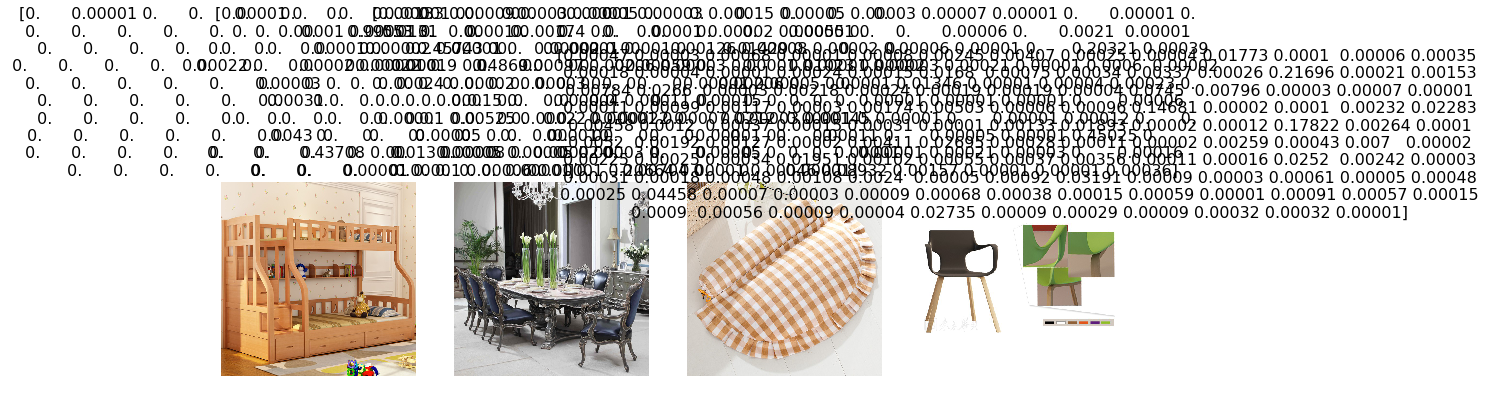

In [42]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [43]:
accuracy_np(probs, y)

0.8822641509433963

In [41]:
def get_filenames():
    filenames = data.test_ds.fnames
    filenames = [trim_jpeg(filename) for filename in filenames]
    return filenames

In [42]:
def trim_jpeg(filename):
    slash_index = filename.index('/') + 1
    dot_index = filename.index('.')
    return filename[slash_index:dot_index]

In [220]:
with open(f'{PATH}submission.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(('id', 'predicted'))
    writer.writerows(zip(filenames, indices))
    for m in missing:
        writer.writerow((m, 1))

In [49]:
def get_missing(indices):
    acc = []
    for x in range(1, 12800):
        if x not in indices:
            acc.append(x)
    return acc

In [47]:
def make_submission(preds, incidces):
    missing = get_missing(indices)
    with open(f'{PATH}submission.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(('id', 'predicted'))
        writer.writerows(zip(indices, preds))
        for m in missing:
            writer.writerow((m, 1))

In [50]:
make_submission(indexed_preds, indices)

In [80]:
trn_tfms, val_tfms = tfms_from_model(arch,sz)

In [90]:
full_filenames = data.test_ds.fnames
image = open_image(f'{PATH}{full_filenames[7635]}')
im = val_tfms(image)
learn.precompute=False
preds = learn.predict_array(im[None])
np.argmax(preds)

86

In [84]:
full_filenames

['test/9885.jpg',
 'test/2701.jpg',
 'test/11231.jpg',
 'test/2964.jpg',
 'test/10651.jpg',
 'test/8302.jpg',
 'test/3656.jpg',
 'test/146.jpg',
 'test/2383.jpg',
 'test/8375.jpg',
 'test/12209.jpg',
 'test/2759.jpg',
 'test/7196.jpg',
 'test/6623.jpg',
 'test/9046.jpg',
 'test/3139.jpg',
 'test/2993.jpg',
 'test/7106.jpg',
 'test/1597.jpg',
 'test/7190.jpg',
 'test/4406.jpg',
 'test/11664.jpg',
 'test/9112.jpg',
 'test/12505.jpg',
 'test/1127.jpg',
 'test/8657.jpg',
 'test/5462.jpg',
 'test/4651.jpg',
 'test/9998.jpg',
 'test/12051.jpg',
 'test/11696.jpg',
 'test/1547.jpg',
 'test/12748.jpg',
 'test/4219.jpg',
 'test/8107.jpg',
 'test/9354.jpg',
 'test/6594.jpg',
 'test/10312.jpg',
 'test/8801.jpg',
 'test/8068.jpg',
 'test/8700.jpg',
 'test/6761.jpg',
 'test/7812.jpg',
 'test/3116.jpg',
 'test/6870.jpg',
 'test/11602.jpg',
 'test/7636.jpg',
 'test/5760.jpg',
 'test/962.jpg',
 'test/82.jpg',
 'test/6615.jpg',
 'test/3189.jpg',
 'test/7267.jpg',
 'test/11532.jpg',
 'test/5915.jpg',
 't

In [69]:
submission_csv = f'{PATH}submission.csv'
submission_df = pd.read_csv(submission_csv)

In [70]:
sorted_df = submission_df.sort_values('id')

In [71]:
sorted_df.to_csv(f'{PATH}submission_sorted.csv', index=False)

In [13]:
sorted_df = pd.read_csv(f'{PATH}submission_sorted.csv')

In [18]:
sorted_df['predicted'] = sorted_df['predicted'] + 1

In [111]:
with open(f'{PATH}writer_submission.csv', "w") as csv_file:
        csv_file.write('id,predicted\n')
        for index,row in sorted_df.iterrows():
            csv_file.write('%s,%s\n' % (row['id'], row['predicted']))

In [11]:
sorted_df.to_csv(f'{PATH}submission_indexed.csv', index=False)

In [15]:
sorted_df.groupby('predicted')

In [19]:
sorted_df.sort_values('predicted')

,id,predicted
7378,7379,1
11721,11722,1
4930,4931,1
10628,10629,1
6851,6852,1
11495,11496,1
6835,6836,1
3110,3111,1
2693,2694,1
7718,7719,1
